# Captstone Project 2

#### Required Libraries
like numpy and pandas has been imported

In [4]:
import numpy as np # library to handle data in a vectorized manner

import urllib.request
import time

from urllib.request import urlopen

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         240 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0

The following packages will be UPDATED:

  certifi                          2020.12.5-py36h5fab9bb_0 --> 2020.12.5-py36h5fab9bb_1



geopy-2.1.0          | 64 KB     

In [2]:
pip install lxml

     |████████████████████████████████| 5.5MB 8.8MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install BeautifulSoup4

     |████████████████████████████████| 122kB 6.7MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
from bs4 import BeautifulSoup

In [6]:
#requests.get(url).text will ping a website and return you HTML of the website.
URL = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = requests.get(URL)

soup = BeautifulSoup(page.text, 'lxml')
#soup.prettify()

In [7]:
postalCode_table = soup.find(class_='wikitable sortable')
#postalCode_table
soup.title
soup.title.string

'List of postal codes of Canada: M - Wikipedia'

In [9]:
dt = []
col = []

for index, tr in enumerate(postalCode_table.findAll('tr')):
    sec = []
    for td in tr.findAll(['th','td']):
        sec.append(td.text.rstrip())
        if (index == 0 ):
            col = sec
        else:
            dt.append(sec)

toronto_df = pd.DataFrame(data = dt, columns = col)
toronto_df = toronto_df[toronto_df['Borough'] != 'Not assigned'].reset_index(drop=True)
toronto_df.head(20).drop_duplicates().reset_index(drop=True)



,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"


In [10]:
lat_long_dt = pd.read_csv("http://cocl.us/Geospatial_data")
toronto_df = toronto_df.merge(lat_long_dt)
toronto_df = toronto_df.drop_duplicates().reset_index(drop=True)
toronto_df = toronto_df.drop('Postal Code',1)
toronto_df.head()

,Borough,Neighbourhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [11]:
toronto_df.shape

(103, 4)

So there are a total of 103 postal codes in Toronto. 

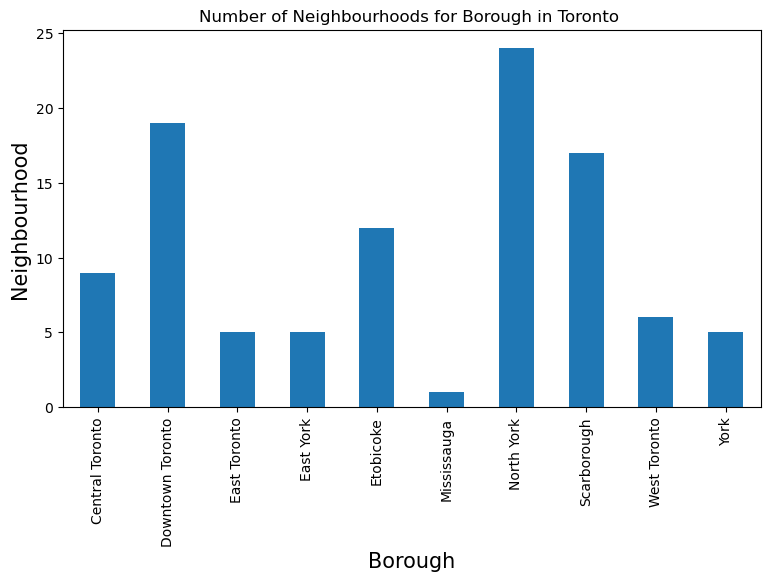

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighbourhoods for Borough in Toronto ')
# x-axis
plt.xlabel('Borough', fontsize = 15)
# y-axis
plt.ylabel('Neighbourhood', fontsize=15)
#setting a bar plot
toronto_df.groupby('Borough')['Neighbourhood'].count().plot(kind='bar')
#result
plt.show()

In this case, North York has the highest number of neighbourhoods.

In [13]:
pip install geocoder

     |████████████████████████████████| 102kB 17.5MB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize




#### Foursquare API Usage

In [15]:
# code: NUTNULLUNGPCQQK2Z1U3PFKYSJ10IT5DDAT4UGCHDVQQKZH2#_=_
# accessToken: U4RIZLIH0241ZI4P00FQZYDBQ3SZPQMWKJY4GU0YTZEJKM4Q
# function that extracts the category of the venue
    
def get_Data(lat,lng):
    radius = 1000
    LIMIT = 100
    CLIENT_ID = '3T23SQORTJ5GWWYMMWMUZQJLXZVMX3WZEOSXVCLO2CKS213O' # your Foursquare ID
    CLIENT_SECRET = '44OFWBAGAXTB01GUTMZMDOOKFDSVPVE1TNH1QDUIXVMX4JUA' # your Foursquare Secret
    ACCESS_TOKEN = 'U4RIZLIH0241ZI4P00FQZYDBQ3SZPQMWKJY4GU0YTZEJKM4Q' # your FourSquare Access Token
    VERSION = '20180605'
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
    
    results = requests.get(url).json()['response']['groups'][0]['items']
    venue_details=[]
    for row in venues:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category = row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    print ("done")
    return df



In [16]:
def get_venue_details(venue_id):
        
    CLIENT_ID = '3T23SQORTJ5GWWYMMWMUZQJLXZVMX3WZEOSXVCLO2CKS213O' # i have changed the id with ##
    CLIENT_SECRET = '44OFWBAGAXTB01GUTMZMDOOKFDSVPVE1TNH1QDUIXVMX4JUA' # i have changed the secret with ##
    VERSION = '20180605'
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&query={}&radius={}&limit={}'.format(venue_id,
            CLIENT_ID, 
            CLIENT_SECRET,VERSION)

    # get all the data
    results = requests.get(url).json()
    venues=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_details.append([venue_id,venue_name])
    except KeyError:
        pass
        
    column_names=['ID','Name']
    df = pd.DataFrame(venue_details,columns=column_names)
  
    return df

#### Geographical Data of Toronto
thus, geolocator has been applied to find out the latitude and longitude of toronto

In [17]:
address ='Toronto, Ontario'
# get geo location of address
geolocator = Nominatim(user_agent="TO_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [18]:
radius = 1000
LIMIT = 100
CLIENT_ID = '3T23SQORTJ5GWWYMMWMUZQJLXZVMX3WZEOSXVCLO2CKS213O' # your Foursquare ID
CLIENT_SECRET = '44OFWBAGAXTB01GUTMZMDOOKFDSVPVE1TNH1QDUIXVMX4JUA' # your Foursquare Secret
ACCESS_TOKEN = 'U4RIZLIH0241ZI4P00FQZYDBQ3SZPQMWKJY4GU0YTZEJKM4Q' # your FourSquare Access Token
VERSION = '20180605'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, latitude, longitude, radius, LIMIT)
    
url

'https://api.foursquare.com/v2/venues/search?client_id=3T23SQORTJ5GWWYMMWMUZQJLXZVMX3WZEOSXVCLO2CKS213O&client_secret=44OFWBAGAXTB01GUTMZMDOOKFDSVPVE1TNH1QDUIXVMX4JUA&v=20180605&ll=43.6534817,-79.3839347&radius=1000&limit=100'

#### Get relevant part of JSON and transform it into a _pandas_ dataframe

#### Define information of interest and filter dataframe



In [19]:
! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')

Folium installed


## Cluster Neighbourhood

Run k-means to cluster the neighbourhood into 5 clusters.

In [150]:
toronto_df.loc[0, 'Neighbourhood']

'Parkwoods'

In [20]:
CLIENT_ID = '3T23SQORTJ5GWWYMMWMUZQJLXZVMX3WZEOSXVCLO2CKS213O' # your Foursquare ID
CLIENT_SECRET = '44OFWBAGAXTB01GUTMZMDOOKFDSVPVE1TNH1QDUIXVMX4JUA' # your Foursquare Secret
ACCESS_TOKEN = 'U4RIZLIH0241ZI4P00FQZYDBQ3SZPQMWKJY4GU0YTZEJKM4Q' # your FourSquare Access Token
VERSION = '20180605'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, latitude, longitude, radius, LIMIT)
    
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3T23SQORTJ5GWWYMMWMUZQJLXZVMX3WZEOSXVCLO2CKS213O
CLIENT_SECRET:44OFWBAGAXTB01GUTMZMDOOKFDSVPVE1TNH1QDUIXVMX4JUA


In [21]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 2000 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
new_df = toronto_df
new_df.head()

,Borough,Neighbourhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [23]:
#find the venues in Toronto
to_ve = getNearbyVenues(names=new_df['Neighbourhood'],
                                   latitudes=new_df['Latitude'],
                                   longitudes=new_df['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [274]:
to_ve.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,100,100,100,100,100,100
"Alderwood, Long Branch",100,100,100,100,100,100
"Bathurst Manor, Wilson Heights, Downsview North",58,58,58,58,58,58
Bayview Village,52,52,52,52,52,52
"Bedford Park, Lawrence Manor East",100,100,100,100,100,100
Berczy Park,100,100,100,100,100,100
"Birch Cliff, Cliffside West",47,47,47,47,47,47
"Brockton, Parkdale Village, Exhibition Place",100,100,100,100,100,100
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",100,100,100,100,100,100


In [25]:
#choose the restaurant's keyword from venue categories
print('Restaurant keywords from venue categories: ')
list(to_ve['Venue Category'].unique())

Restaurant keywords from venue categories: 


['Caribbean Restaurant',
 'Café',
 'Golf Course',
 'Supermarket',
 'Event Space',
 'Middle Eastern Restaurant',
 'Liquor Store',
 'Park',
 'Mediterranean Restaurant',
 'Seafood Restaurant',
 'Gym / Fitness Center',
 'Japanese Restaurant',
 'Gym',
 'Grocery Store',
 'American Restaurant',
 'Fried Chicken Joint',
 'Pool Hall',
 'Ice Cream Shop',
 'Steakhouse',
 'Burger Joint',
 'Discount Store',
 'Fish & Chips Shop',
 'Pizza Place',
 'Fast Food Restaurant',
 'Salad Place',
 'Persian Restaurant',
 'Chinese Restaurant',
 'Italian Restaurant',
 'Pharmacy',
 'Filipino Restaurant',
 'Coffee Shop',
 'Paper / Office Supplies Store',
 'Beer Store',
 'Thai Restaurant',
 'Hotel',
 'Sandwich Place',
 'Hakka Restaurant',
 'Gas Station',
 'Bar',
 'Bank',
 'Breakfast Spot',
 'Asian Restaurant',
 'Wings Joint',
 'Automotive Shop',
 'Intersection',
 'Furniture / Home Store',
 'Skating Rink',
 'Tennis Court',
 'Diner',
 'Greek Restaurant',
 'Sushi Restaurant',
 'Pet Store',
 'Spa',
 'Shopping Mall',
 'Hi

In [30]:
chinese_restaurant = [ 'Chinese Restaurant', 'Dim Sum Restaurant',
             'Noodle House', 'Hakka Restaurant',  'Taiwanese Restaurant',  
             'Dumpling Restaurant','Asian Reataurant','Hong Kong Restaurant', 
             'Hotpot Restaurant','Xinjiang Restaurant',
 'Szechuan Restaurant'
             ]

chinese_pd = pd.DataFrame(chinese_restaurant)
#rename the coloumns so the match
chinese_pd = chinese_pd.rename(columns={0:'Venue Category'})

#Join the 2 dataframes as instructed
new_df = pd.merge(to_ve, chinese_pd, on='Venue Category', how='right')

# display the new dataframe
#TO_new

new_df.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,15,15,15,15,15,15
Bayview Village,7,7,7,7,7,7
"Bedford Park, Lawrence Manor East",1,1,1,1,1,1
Berczy Park,1,1,1,1,1,1
Caledonia-Fairbanks,1,1,1,1,1,1
Canada Post Gateway Processing Centre,1,1,1,1,1,1
Cedarbrae,3,3,3,3,3,3
"Clarks Corners, Tam O'Shanter, Sullivan",6,6,6,6,6,6
"Cliffside, Cliffcrest, Scarborough Village West",1,1,1,1,1,1


In [31]:
# one hot encoding
TO_onehot = pd.get_dummies(new_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
TO_onehot['Neighborhood'] = new_df['Neighborhood'] 


# move neighborhood column to the first column
fixed_columns = [TO_onehot.columns[-1]] + list(TO_onehot.columns[:-1])
TO_onehot = TO_onehot[fixed_columns]

TO_onehot.head().drop_duplicates().reset_index(drop=True)

,Neighborhood,Asian Reataurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Hakka Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Noodle House,Szechuan Restaurant,Taiwanese Restaurant,Xinjiang Restaurant
0,Parkwoods,0,1,0,0,0,0,0,0,0,0,0
1,Victoria Village,0,1,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,1,0,0,0,0,0,0,0,0,0


In [33]:
#Analyze all the neighbourhood

grouped_dt = TO_onehot.groupby('Neighborhood').mean().reset_index()


grouped_dt.head()

,Neighborhood,Asian Reataurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Hakka Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Noodle House,Szechuan Restaurant,Taiwanese Restaurant,Xinjiang Restaurant
0,Agincourt,0.0,0.866667,0.0,0.0,0.0,0.066667,0.0,0.066667,0.000000,0.000000,0.0
1,Bayview Village,0.0,0.714286,0.0,0.0,0.0,0.000000,0.0,0.000000,0.142857,0.142857,0.0
2,"Bedford Park, Lawrence Manor East",0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
3,Berczy Park,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,Caledonia-Fairbanks,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [34]:
grouped_dt.shape

(45, 12)

In [37]:
num_top_venues = 5

for hood in grouped_dt['Neighborhood']:
    print("----"+hood+"----")
    temp = grouped_dt[grouped_dt['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                  venue  freq
0    Chinese Restaurant  0.87
1  Hong Kong Restaurant  0.07
2          Noodle House  0.07
3      Asian Reataurant  0.00
4    Dim Sum Restaurant  0.00


----Bayview Village----
                  venue  freq
0    Chinese Restaurant  0.71
1   Szechuan Restaurant  0.14
2  Taiwanese Restaurant  0.14
3      Asian Reataurant  0.00
4    Dim Sum Restaurant  0.00


----Bedford Park, Lawrence Manor East----
                 venue  freq
0   Chinese Restaurant   1.0
1     Asian Reataurant   0.0
2   Dim Sum Restaurant   0.0
3  Dumpling Restaurant   0.0
4     Hakka Restaurant   0.0


----Berczy Park----
                 venue  freq
0   Chinese Restaurant   1.0
1     Asian Reataurant   0.0
2   Dim Sum Restaurant   0.0
3  Dumpling Restaurant   0.0
4     Hakka Restaurant   0.0


----Caledonia-Fairbanks----
                 venue  freq
0   Chinese Restaurant   1.0
1     Asian Reataurant   0.0
2   Dim Sum Restaurant   0.0
3  Dumpling Restaurant   0.0
4     H

In [42]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = grouped_dt['Neighborhood']

for ind in np.arange(grouped_dt.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped_dt.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Agincourt,Chinese Restaurant,Noodle House,Hong Kong Restaurant,Xinjiang Restaurant,Taiwanese Restaurant
1,Bayview Village,Chinese Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Xinjiang Restaurant,Noodle House
2,"Bedford Park, Lawrence Manor East",Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Noodle House
3,Berczy Park,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Noodle House
4,Caledonia-Fairbanks,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Noodle House


In [43]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = grouped_dt.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int32)

In [46]:
TO_labels = pd.merge(new_df,grouped_dt, on='Neighborhood', how='right')
TO_labels.shape

(132, 18)

In [48]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

to_merged = TO_labels
to_merged['Cluster Labels'] = kmeans.labels_
# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
to_merged = to_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

to_merged.head() # check the last columns!

ValueError: Length of values (45) does not match length of index (132)

In [49]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Latitude'], to_merged['Longitude'], to_merged['Neighborhood'], to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

KeyError: 'Latitude'